In [1]:
import numpy as np
from Liquid import Liquid
from graficas import graph, plotConnectivity

In [2]:
def tiempos(dato, channels):
    i = 0
    n = len(dato['timestamps'])
    t_curr = 0
    t_end = dato['max_timestamps']
    cero = np.zeros(channels)
    
    while t_curr <= t_end:
        lista = []
        
        while i < n and dato['timestamps'][i] == t_curr:
            lista.append(dato['addresses'][i])
            # v[dato['addresses'][i]] = 1
            i += 1
        
        if lista:
            v = cero.copy()
            v[lista] = 1
            yield(v)
        else:
            yield(lista)
        t_curr += 1

In [3]:
def entradas(dataset, start=0, end=None):
    if end is None:
        end = len(dataset)
    for a in range(start, end):
        yield tiempos(dataset[a], 64)

In [4]:
from LSM_tools import load_directory
from pyNAVIS import MainSettings
from pathlib import Path

In [ ]:
settings = MainSettings(mono_stereo=0, address_size=2, ts_tick=0.2, bin_size=2000, num_channels=64)

off_folder = Path("On_Off") / "off_aedats"
on_folder = Path("On_Off") / "on_aedats"

all_data_off = load_directory(off_folder, settings)
all_data_on = load_directory(on_folder, settings)

OnOff tiene 64 canales, por lo que deben tenerse más de 64 neuronas.

In [6]:
# 5*5*5 = 125

liquido = Liquid((5,5,5), 64, 10)

In [7]:
sim = liquido.simulacion(entradas(all_data_off[:5]))

IndexError: index 11 is out of bounds for axis 0 with size 11

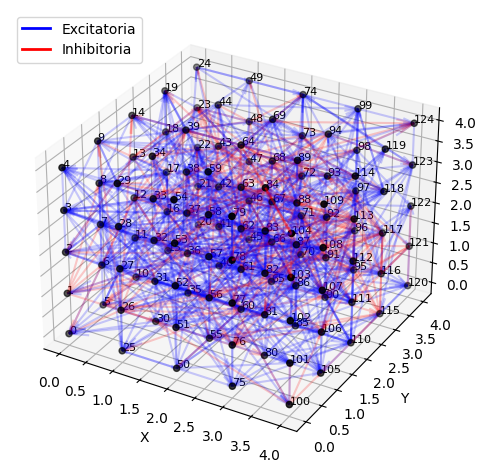

In [5]:
plotConnectivity(liquido.C_eq, liquido.shape_liquid, show_arrows=True, show_labels=True)

In [14]:
print(all_data_off[0])

{'file_name': '00176480_nohash_0.wav.aedat', 'addresses': array([41, 34, 39, ..., 36, 14, 18], dtype='>u2'), 'timestamps': array([     0,    123,    865, ..., 452774, 452813, 452882], dtype='>u4'), 'max_timestamps': 452882}
